In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import os
import shutil
import pickle as pk

from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Satelite_Numeric_data/New Dataset 5000.csv")
data.head(5)

StationId        Datetime  PM2.5  PM10    NO    NO2    NOx    NH3    CO  \
0     TG002  5/14/2018 0:00  35.25  88.5  2.12  33.10  19.30  14.10  0.96   
1     TG002  5/14/2018 1:00  32.00  73.5  2.17  20.30  12.60  13.80  0.17   
2     TG002  5/14/2018 2:00  20.50  58.0  3.00  17.35  11.65  13.48  1.53   
3     TG002  5/14/2018 3:00  21.00  50.0  2.73  18.28  11.93  13.50  2.96   
4     TG002  5/14/2018 4:00  18.50  43.5  2.20  16.38  10.45  15.13  3.49   

    SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4  2.20  70.90     1.20     1.10    1.03  124   Moderate

In [ ]:
df = data.drop(['StationId', 'Datetime', 'AQI_Bucket'], axis=1)
df

PM2.5    PM10     NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  \
0     35.25   88.50   2.12   33.10  19.30  14.10  0.96  1.97  67.25     4.98   
1     32.00   73.50   2.17   20.30  12.60  13.80  0.17  2.77  80.75     3.40   
2     20.50   58.00   3.00   17.35  11.65  13.48  1.53  2.95  77.22     2.02   
3     21.00   50.00   2.73   18.28  11.93  13.50  2.96  2.02  36.35     1.42   
4     18.50   43.50   2.20   16.38  10.45  15.13  3.49  2.20  70.90     1.20   
...     ...     ...    ...     ...    ...    ...   ...   ...    ...      ...   
5086  40.75   93.75   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30   
5087  64.25  151.75   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22   
5088  82.25  179.50  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55   
5089  78.25  165.00  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62   
5090  75.50  160.75  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65   

      Toluene  Xylene  AQI  
0        7.43    2.70  168  
1        4.27    1.57  124  
2        2.55    1.18  124  
3        1.57    0.80  124  
4        1.10    1.03  124  
...       ...     ...  ...  
5086     7.35    3.00  106  
5087    16.48    8.20  106  
5088    23.40   12.93  106  
5089    24.93   15.65  107  
5090    22.52   15.62  108  

[5091 rows x 13 columns]

In [ ]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [ ]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# Generate TrainX and TrainY
trainX, testX, trainY, testY = train_test_split(X, y, test_size= 1 - train_ratio)
# Genearate ValX, TestX, ValY and TestY
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
print(trainX.shape)
print(valX.shape)
print(testX.shape)

(3563, 10)
(764, 10)
(764, 10)


In [ ]:
sc=StandardScaler()

scaler = sc.fit(trainX)

trainX_scaled = scaler.transform(trainX)
valX_scaled = scaler.transform(valX)
testX_scaled = scaler.transform(testX)

In [ ]:
checkpoint_no = 'ckpt_1_NN'
model_name = 'satellite_ANN_2FC_F64_64_epoch_120'

In [ ]:
input_shape = trainX.shape[1]

n_batch_size = 128

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)

n_epochs = 120


print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))

Input Shape: 10
Batch Size: 128

Steps per Epoch: 27

Validation Steps: 5
Test Steps: 5

Number of Epochs: 120


In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['mae'])

In [ ]:
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name,
                                   monitor='val_loss', save_best_only=True, mode='auto')]

In [ ]:
history = model.fit(trainX_scaled,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Epoch 1/120
27/27 [==============================] - 7s 31ms/step - loss: 9898.0088 - mae: 90.5697 - val_loss: 8892.4746 - val_mae: 85.4722
Epoch 2/120
27/27 [==============================] - 1s 21ms/step - loss: 8837.1787 - mae: 84.6298 - val_loss: 7607.1250 - val_mae: 77.7991
Epoch 3/120
27/27 [==============================] - 1s 27ms/step - loss: 7285.0459 - mae: 75.1792 - val_loss: 5895.7192 - val_mae: 66.3873
Epoch 4/120
27/27 [==============================] - 1s 20ms/step - loss: 5440.8022 - mae: 62.4890 - val_loss: 4129.9243 - val_mae: 53.6687
Epoch 5/120
27/27 [==============================] - 1s 20ms/step - loss: 3706.9211 - mae: 50.7590 - val_loss: 2754.1594 - val_mae: 43.2756
Epoch 6/120
27/27 [==============================] - 1s 34ms/step - loss: 2665.6289 - mae: 42.9642 - val_loss: 1981.0912 - val_mae: 36.2043
Epoch 7/120
27/27 [==============================] - 1s 22ms/step - loss: 1943.3790 - mae: 36.1829 - val_loss: 1469.0570 - val_mae: 30.1729
Epoch 8/120
27/27 [=

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

epoch         loss        mae     val_loss    val_mae
0      1  9898.008789  90.569733  8892.474609  85.472244
1      2  8837.178711  84.629791  7607.125000  77.799057
2      3  7285.045898  75.179169  5895.719238  66.387344
3      4  5440.802246  62.489010  4129.924316  53.668663
4      5  3706.921143  50.759010  2754.159424  43.275581

In [ ]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

epoch        loss        mae    val_loss    val_mae
119    120  327.364044  13.441683  331.976318  13.851021

In [ ]:
pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))


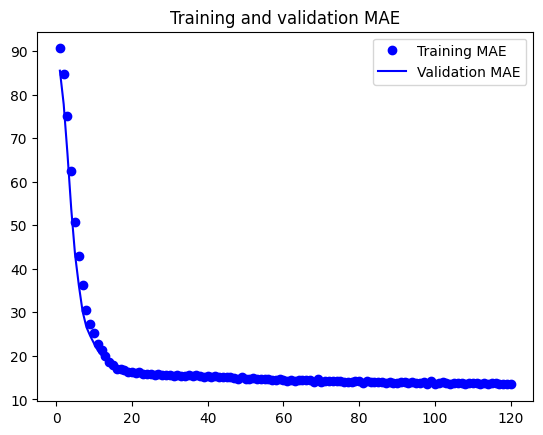

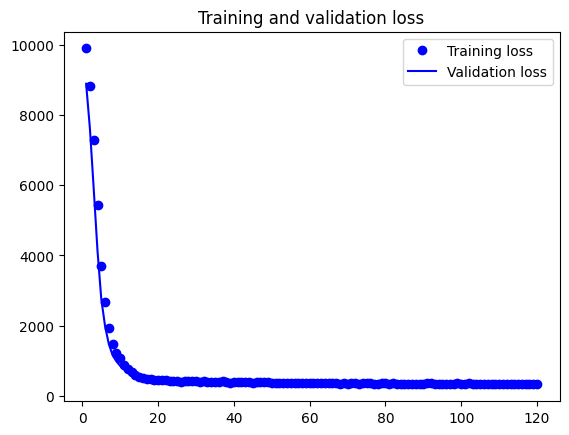

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [ ]:
k = 5
num_val_samples = len(trainX) // k
all_scores = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    print('MAE: ' + str(val_mae))
    print('----------------------')

Processing Fold 0
MAE: 14.112333297729492
----------------------
Processing Fold 1
MAE: 14.017934799194336
----------------------
Processing Fold 2
MAE: 14.58512020111084
----------------------
Processing Fold 3
MAE: 14.133973121643066
----------------------
Processing Fold 4
MAE: 14.286707878112793
----------------------


In [ ]:
for i, val in enumerate(all_scores):
    print('Fold ' + str(i) +': ' + 'MAE of', val)

Fold 0: MAE of 14.112333297729492
Fold 1: MAE of 14.017934799194336
Fold 2: MAE of 14.58512020111084
Fold 3: MAE of 14.133973121643066
Fold 4: MAE of 14.286707878112793


In [ ]:
all_mae_histories = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(n_epochs)]

len(average_mae_history)

120

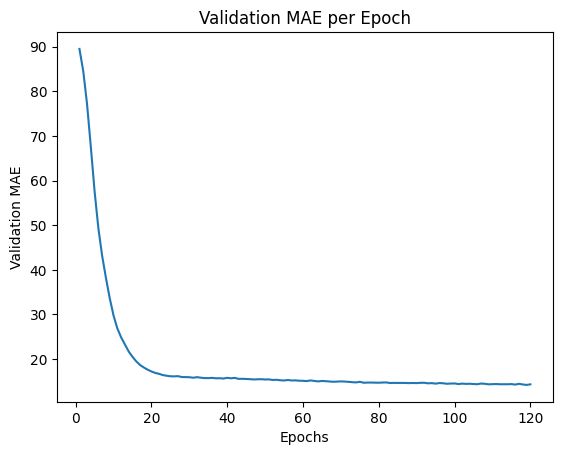

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
      '''
      Function for smoothing data points

      Args:
          points (float64): Array of floats to be smoothed, numpy array of floats

      Returns:
          Smoothed data points
      '''
      smoothed_points = []
      for point in points:
        if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
        else:
          smoothed_points.append(point)
      return smoothed_points

In [ ]:
n_first_observations_to_exclude = 30

smooth_mae_history = smooth_curve(average_mae_history[n_first_observations_to_exclude:])

smooth_mae_history = pd.DataFrame(smooth_mae_history)
smooth_mae_history = smooth_mae_history.set_index(smooth_mae_history.index + n_first_observations_to_exclude)
smooth_mae_history.head()

0
30  15.831124
31  15.843637
32  15.843826
33  15.834065
34  15.824854

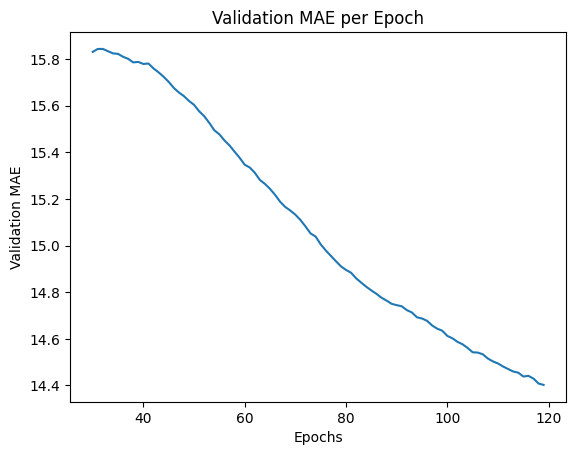

In [ ]:
plt.plot(smooth_mae_history)
plt.title('Validation MAE per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Loading the automatically saved model
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
best_model = load_model(model_name_temp)


In [ ]:
test_loss, test_mae = best_model.evaluate(testX_scaled,
                                          testY,
                                          steps=n_test_steps)
print()
print('Test MAE:', test_mae)

5/5 [==============================] - 0s 4ms/step - loss: 372.7524 - mae: 14.2246

Test MAE: 14.224573135375977


In [ ]:
y_pred = model.predict(testX_scaled)
y_pred[:5]

24/24 [==============================] - 0s 2ms/step


array([[161.14816 ],
       [ 63.756767],
       [141.4128  ],
       [ 99.19481 ],
       [123.65795 ]], dtype=float32)

In [ ]:
df_testY = pd.DataFrame(testY)
df_y_pred = pd.DataFrame(y_pred)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0       147  161.148163
1        42   63.756767
2       119  141.412796
3        77   99.194809
4       128  123.657951
..      ...         ...
759     107  111.795624
760      87   74.802986
761      63   90.968285
762      23   41.604290
763      57   60.378017

[764 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred))
print('r2 score :', r2_score(testY, y_pred))


Mean Absolute Error: 14.224573489883182
Mean Squared Error: 372.7524671324842
Root Mean Squared Error: 19.306798469256474
Mean Absolute Percentage Error: 0.19033452447331084
r2 score : 0.784002209460185


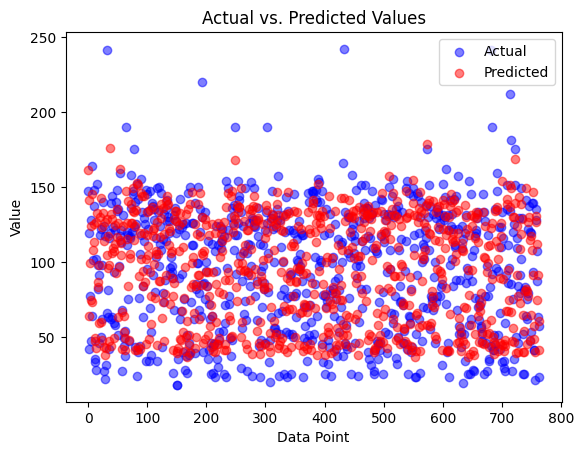

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_results contains the 'Actual' and 'Predicted' columns
actual_values = df_results['Actual']
predicted_values = df_results['Predicted']

plt.scatter(range(len(actual_values)), actual_values, label='Actual', color='blue', alpha=0.5)
plt.scatter(range(len(predicted_values)), predicted_values, label='Predicted', color='red', alpha=0.5)

plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs. Predicted Values')

plt.show()